## Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify
import numpy as np

## Data Loading and Pre-processing

In [2]:
file_name =  "ERC_formatted.xlsx"

# loading DataFrames
pocet_obyvatelov = pd.read_excel(io=file_name, sheet_name=0)
narodeni = pd.read_excel(io=file_name, sheet_name=1)
zomreti = pd.read_excel(io=file_name, sheet_name=2)
vnutorna_migracia_pristahovani = pd.read_excel(io=file_name, sheet_name=3)
vnutorna_migracia_vystahovani = pd.read_excel(io=file_name, sheet_name=4)
zahranicna_migracia_vystahovani = pd.read_excel(io=file_name, sheet_name=5)
zahranicna_migracia_pristahovani = pd.read_excel(io=file_name, sheet_name=6)
priemerna_mzda = pd.read_excel(io=file_name, sheet_name=7)
zamestanost = pd.read_excel(io=file_name, sheet_name=8)
pocet_gymnazii = pd.read_excel(io=file_name, sheet_name=9)
pocet_strednych_odbornych_skol = pd.read_excel(io=file_name, sheet_name=10)

# arrays of names and dataframes
dataframes = [pocet_obyvatelov, narodeni, zomreti, vnutorna_migracia_pristahovani, vnutorna_migracia_vystahovani, zahranicna_migracia_vystahovani, zahranicna_migracia_pristahovani, priemerna_mzda, zamestanost, pocet_gymnazii, pocet_strednych_odbornych_skol]
names_of_datagrames = ["pocet_obyvatelov", "narodeni", "zomreti", "vnutorna_migracia_pristahovani", "vnutorna_migracia_vystahovani", "zahranicna_migracia_vystahovani", "zahranicna_migracia_pristahovani", "priemerna_mzda", "zamestanost", "pocet_gymnazii", "pocet_strednych_odbornych_skol"]

# creating dictionary of dataframes for each year from 2010 to 2021
years = {}
for year in range(2010,2022):
    years[year] = pd.DataFrame(pocet_obyvatelov["Okres"])
    for i in range(len(dataframes)):
        years[year][names_of_datagrames[i]] = dataframes[i][year]


## MISC commands (debug tools)

In [3]:
# MISC getting row of Okres Bratislava I
# print(years[2010][years[2010]["Okres"] == "Okres Bratislava I"])

In [ ]:
# # plotting correlation heatmap for every year
# for year in range(2010,2022):
#     correlation_matrix_data = years[year]
    
#     mask = np.triu(np.ones_like(correlation_matrix_data.corr(), dtype=bool))
#     # print(correlation_matrix_data.corr())
#     dataplot=sb.heatmap(correlation_matrix_data.corr(), annot=True, cmap="YlGnBu", mask = mask)

#     # displaying heatmaps
#     plt.show()

## Average corelation heatmap

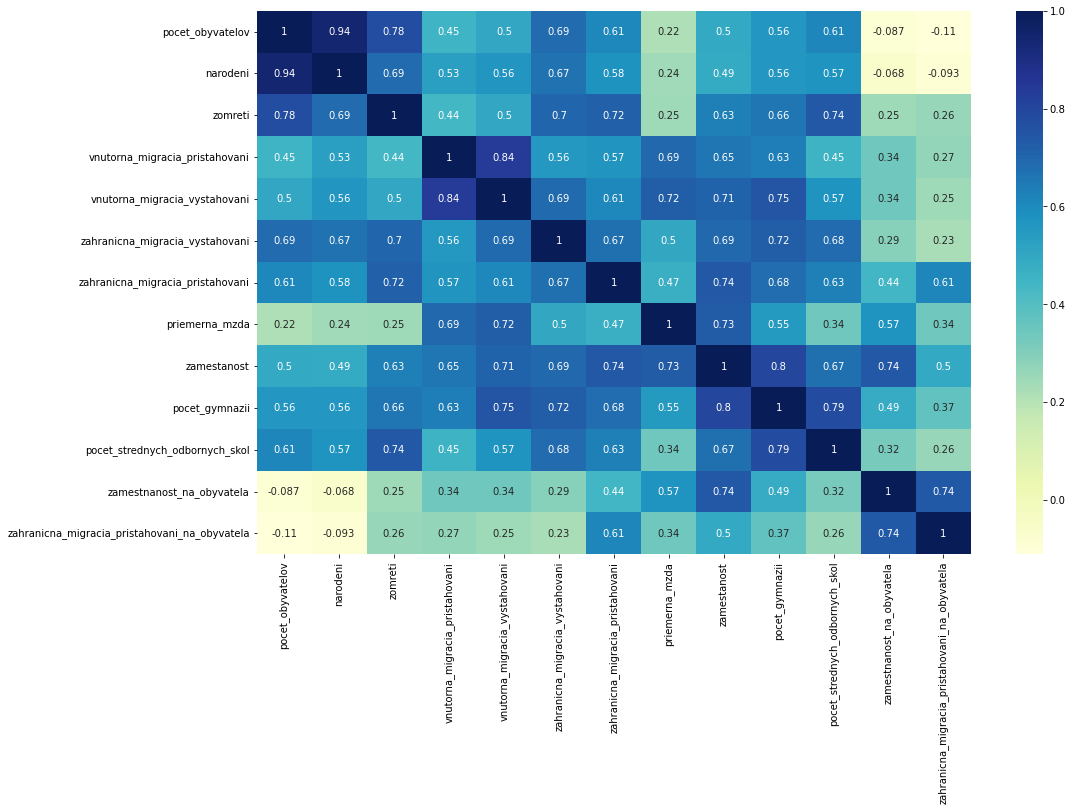

In [30]:
sum_of_correlations = years[2010].corr()

for year in range(2011,2022):
    sum_of_correlations += years[year].corr()

sum_of_correlations = sum_of_correlations / 12

fig, ax = plt.subplots(figsize=(16,10)) 

mask = np.triu(np.ones_like(years[2010].corr(), dtype=bool))
dataplot=sb.heatmap(sum_of_correlations, annot=True, cmap="YlGnBu", ax = ax)


## Different correlation plots

0.772751834210593

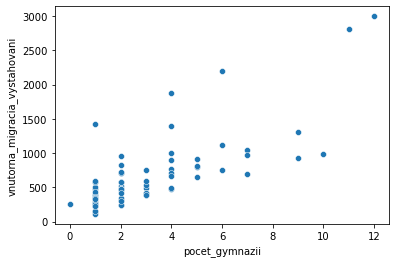

In [5]:
# do sb.scatterplot from seaborn library including x and y axis where x is "pocet_gymnazii" and y is "vnutorna_migracia_vystahovani"
sb.scatterplot(data=correlation_matrix_data, x="pocet_gymnazii", y="vnutorna_migracia_vystahovani")
np.corrcoef(years[2010]["pocet_gymnazii"], years[2010]["vnutorna_migracia_vystahovani"])[0, 1]

<AxesSubplot:xlabel='pocet_gymnazii', ylabel='priemerna_mzda'>

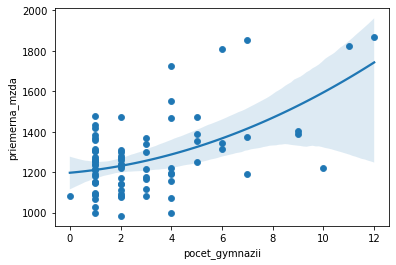

In [6]:
# sb.scatterplot(x="pocet_strednych_odbornych_skol", y="priemerna_mzda", data=data)
sb.scatterplot(x="pocet_gymnazii", y="priemerna_mzda", data=correlation_matrix_data)
sb.regplot(x="pocet_gymnazii", y="priemerna_mzda", data=correlation_matrix_data, order=2)

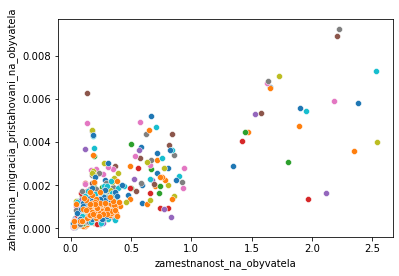

In [7]:
# sb.scatterplot(x="zamestanost", y="zahranicna_migracia_pristahovani", data=years[2010])
for year in range(2010,2022):
    years[year]["zamestnanost_na_obyvatela"] = years[year]["zamestanost"] / years[year]["pocet_obyvatelov"]
    years[year]["zahranicna_migracia_pristahovani_na_obyvatela"] = years[year]["zahranicna_migracia_pristahovani"] / years[2010]["pocet_obyvatelov"]
    sb.scatterplot(x="zamestnanost_na_obyvatela", y="zahranicna_migracia_pristahovani_na_obyvatela", data=years[year])

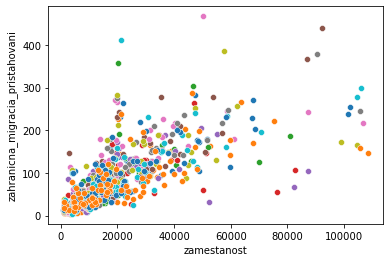

In [8]:
for year in range(2010,2022):
    # sb.lmplot(x="zamestanost", y="zahranicna_migracia_pristahovani", data=years[year])
    sb.scatterplot(x="zamestanost", y="zahranicna_migracia_pristahovani", data=years[year])

<AxesSubplot:xlabel='zomreti', ylabel='pocet_strednych_odbornych_skol'>

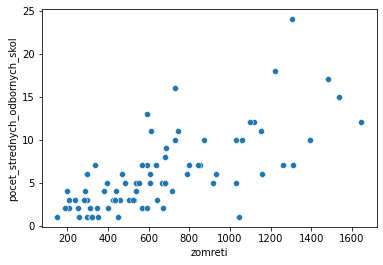

In [9]:
sb.scatterplot(x="zomreti", y="pocet_strednych_odbornych_skol", data=years[2011])

## Heatmap of Slovak districts

,REF,TXT,geometry
0,SK0321,okres Banská Bystrica,"POLYGON ((18.99112 48.80609, 18.99221 48.81087..."
1,SK0322,okres Banská Štiavnica,"POLYGON ((18.75064 48.41116, 18.75472 48.41284..."
2,SK0411,okres Bardejov,"POLYGON ((20.98654 49.30662, 20.98736 49.30825..."
3,SK0101,okres Bratislava I,"POLYGON ((17.07345 48.17451, 17.07748 48.17197..."
4,SK0102,okres Bratislava II,"POLYGON ((17.11736 48.13825, 17.11749 48.13996..."


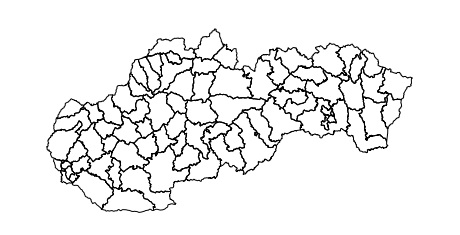

In [10]:
map = gpd.read_file("okresy.json")
geoplot.polyplot(map, projection=gcrs.AlbersEqualArea())
# sort balyes by TXT column A to Z
map = map.sort_values(by=['TXT'])
# reset index
map = map.reset_index(drop=True)
map.head()

In [11]:
# sort by name A to Z of Okres
for year in range(2010,2022):
    years[year] = years[year].sort_values(by=['Okres'])  
    years[year] = years[year].reset_index(drop=True)
map['heatmap'] = years[2021]["pocet_obyvatelov"]
# years[2021].head(10)
map.sort_values(by=['heatmap'], ascending=False)

,REF,TXT,geometry,heatmap
47,SK0417,okres Prešov,"POLYGON ((20.87052 49.00690, 20.87404 49.01081...",172804
37,SK0233,okres Nitra,"POLYGON ((17.83337 48.29675, 17.83295 48.29757...",164788
78,SK031B,okres Žilina,"POLYGON ((18.46496 48.95636, 18.47433 48.95717...",161377
39,SK0234,okres Nové Zámky,"POLYGON ((17.96102 48.13147, 18.00117 48.16595...",138168
67,SK0217,okres Trnava,"POLYGON ((17.31431 48.45597, 17.30394 48.46336...",131894
...,...,...,...,...
44,SK0327,okres Poltár,"POLYGON ((19.58047 48.53711, 19.58423 48.53807...",20634
62,SK041B,okres Stropkov,"POLYGON ((21.56942 49.15917, 21.56970 49.16067...",19878
68,SK0319,okres Turčianske Teplice,"POLYGON ((18.69381 48.90960, 18.69319 48.91178...",15956
1,SK0322,okres Banská Štiavnica,"POLYGON ((18.75064 48.41116, 18.75472 48.41284...",15649


In [12]:
# sort by name A to Z of Okres
for year in range(2010,2022):
    years[year] = years[year].sort_values(by=['Okres'])  
    years[year] = years[year].reset_index(drop=True)
map['heatmap'] = years[2021]["pocet_obyvatelov"]
# years[2021].head(10)
map.sort_values(by=['heatmap'], ascending=False)

,REF,TXT,geometry,heatmap
47,SK0417,okres Prešov,"POLYGON ((20.87052 49.00690, 20.87404 49.01081...",172804
37,SK0233,okres Nitra,"POLYGON ((17.83337 48.29675, 17.83295 48.29757...",164788
78,SK031B,okres Žilina,"POLYGON ((18.46496 48.95636, 18.47433 48.95717...",161377
39,SK0234,okres Nové Zámky,"POLYGON ((17.96102 48.13147, 18.00117 48.16595...",138168
67,SK0217,okres Trnava,"POLYGON ((17.31431 48.45597, 17.30394 48.46336...",131894
...,...,...,...,...
44,SK0327,okres Poltár,"POLYGON ((19.58047 48.53711, 19.58423 48.53807...",20634
62,SK041B,okres Stropkov,"POLYGON ((21.56942 49.15917, 21.56970 49.16067...",19878
68,SK0319,okres Turčianske Teplice,"POLYGON ((18.69381 48.90960, 18.69319 48.91178...",15956
1,SK0322,okres Banská Štiavnica,"POLYGON ((18.75064 48.41116, 18.75472 48.41284...",15649


<GeoAxesSubplot:>

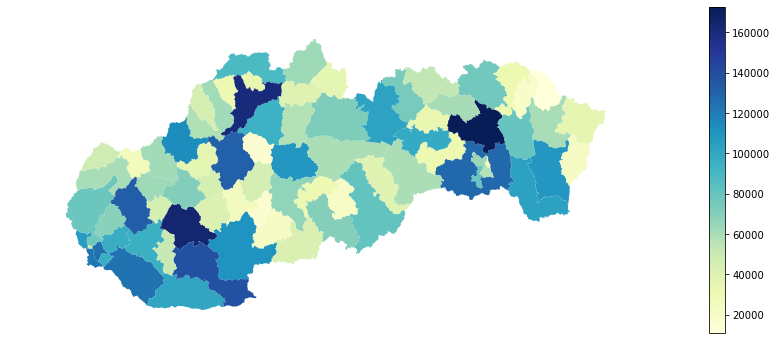

In [13]:
heatmap_data = map["heatmap"]
# scheme = mapclassify.Quantiles(heatmap_data, k=10)

geoplot.choropleth(
    map, hue=heatmap_data, cmap='YlGnBu', figsize=(15, 6), projection=gcrs.AlbersEqualArea(), legend=True
)